In [1]:
import pandas as pd
import env
import seaborn as sns
import acquire
import prepare
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

### 1. Reading in from seaborn dataset

In [2]:
df_iris = sns.load_dataset("iris")

- Print the first three rows of the data set

In [3]:
df_iris
print(df_iris.iloc[:3])

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


- Print the number of rows and columns (shape)

In [4]:
print(f'The number of rows are {df_iris.shape[0]}, The number of columns are {df_iris.shape[1]}')

The number of rows are 150, The number of columns are 5


- print the column names

In [5]:
print(f'{list(df_iris.columns)}')

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


- print the data type of each column

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [7]:
df_iris.describe()
# I would not scale this data

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2. Read data in from excel

In [8]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', index_col=0) 

- assign the first 100 rows to a new dataframe, df_excel_sample

In [9]:
df_excel_sample = df_excel[0:100]
df_excel_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0002-ORFBO to 0177-PXBAT
Data columns (total 11 columns):
gender               100 non-null object
is_senior_citizen    100 non-null int64
partner              100 non-null object
dependents           100 non-null object
phone_service        100 non-null int64
internet_service     100 non-null int64
contract_type        100 non-null int64
payment_type         100 non-null object
monthly_charges      100 non-null float64
total_charges        100 non-null float64
churn                100 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 9.4+ KB


- print the number of rows of your original dataframe

In [10]:
df_excel.shape[0]

7049

- print the first 5 column names

In [11]:
col_list = list(df_excel.columns)
col_list[:4]

['gender', 'is_senior_citizen', 'partner', 'dependents']

- print the column names that have a data type of object

In [12]:
# df_excel_sample.columns.dtypes
# groupby(df_excel_sample.dtypes

# .select_dtypes(object) works on the whole df! Gotta love it!

df_excel.select_dtypes(object).columns.tolist()

['gender', 'partner', 'dependents', 'payment_type', 'churn']

- compute the range for each of the numeric variables.

In [13]:
numeric_df = df_excel.select_dtypes(['int64', 'float64'])
numeric_df

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges
customer_id,,,,,,
0002-ORFBO,0,1,1,1,65.60,593.30
0003-MKNFE,0,2,1,0,59.90,542.40
0004-TLHLJ,0,1,2,0,73.90,280.85
0011-IGKFF,1,1,2,0,98.00,1237.85
0013-EXCHZ,1,1,2,0,83.90,267.40
...,...,...,...,...,...,...
9987-LUTYD,0,1,1,1,55.15,742.90
9992-RRAMN,0,2,2,0,85.10,1873.70
9992-UJOEL,0,1,1,0,50.30,92.75


In [14]:
print(round(numeric_df.max() - numeric_df.min(),2))

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64


### 3. Read data from google sheets

In [15]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- print the first 3 rows

In [16]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- print the number of rows and columns

In [17]:
df_google.shape
print(f'The number of rows are {df_google.shape[0]}, The number of columns are {df_google.shape[1]}')

The number of rows are 891, The number of columns are 12


- print the column names

In [18]:
print(f' The names of the columns are {list(df_google.columns)}')

 The names of the columns are ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


- print the data type of each column

In [19]:
print(f' The data type of each column is {df_google.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
 The data type of each column is None


- print the summary statistics for each of the numeric variables

In [20]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- print the unique values for each of your categorical variables

In [21]:
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df_google.PassengerId.value_counts()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

In [23]:
print(df_google.Name.unique())

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

In [24]:
print(df_google.Sex.unique())

['male' 'female']


In [25]:
print(df_google.Ticket.unique())

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '349245'
 '349215' '35281' '

In [26]:
print(df_google.Cabin.unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [27]:
print(df_google.Embarked.unique())

['S' 'C' 'Q' nan]


#### If you find yourself doing the same thing over and over, consider writing a function

### In a new python module, acquire.py:

- get_titanic_data: returns the titanic data from the codeup data science database as a pandas data frame.

In [28]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


- get_iris_data: returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids.

In [29]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


# Prepare

## 1. Iris Data

- Use the function defined in acquire.py to load the iris data.

In [30]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


- Drop the species_id and measurement_id columns.

In [31]:
iris_df = iris_df.drop(columns=['species_id'])
iris_df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


- Rename the species_name column to just species.

In [32]:
iris_df = iris_df.rename(columns={'species_name': 'species'})
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


- Encode the species name using a sklearn label encoder. Research the inverse_transform method of the label encoder. How might this be useful?

In [33]:
train, test = train_test_split(iris_df, random_state=123, train_size=.8)

In [34]:
train.species.value_counts(dropna=False)

versicolor    44
virginica     39
setosa        37
Name: species, dtype: int64

In [35]:
train.head(10)


,species,sepal_length,sepal_width,petal_length,petal_width
130,virginica,7.4,2.8,6.1,1.9
119,virginica,6.0,2.2,5.0,1.5
29,setosa,4.7,3.2,1.6,0.2
0,setosa,5.1,3.5,1.4,0.2
62,versicolor,6.0,2.2,4.0,1.0
93,versicolor,5.0,2.3,3.3,1.0
131,virginica,7.9,3.8,6.4,2.0
5,setosa,5.4,3.9,1.7,0.4
16,setosa,5.4,3.9,1.3,0.4
82,versicolor,5.8,2.7,3.9,1.2


In [36]:
encoder = LabelEncoder()

encoder.fit(train.species)
train.encoded = encoder.transform(train.species)
test.encoded = encoder.transform(test.species)

In [37]:
train.encoded[0:10]

array([2, 2, 0, 0, 1, 1, 2, 0, 0, 1])

In [38]:
train_array = np.array(train.encoded).reshape(len(train.encoded),1)
test_array = np.array(test.encoded).reshape(len(test.encoded),1)

In [39]:
train_array[0:10]

array([[2],
       [2],
       [0],
       [0],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1]])

In [40]:
cols = ['encoded_' + train.columns[0]]
pd.concat([
    train.species,
    pd.DataFrame(train_array, columns = cols, index=train.index)
], axis=1)

pd.concat([
    test.species,
    pd.DataFrame(test_array, columns = cols, index=test.index)
], axis=1)

,species,encoded_species
72,versicolor,1
112,virginica,2
132,virginica,2
88,versicolor,1
37,setosa,0
138,virginica,2
87,versicolor,1
42,setosa,0
8,setosa,0
90,versicolor,1


- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [41]:
def drop_columns(iris_df):
    iris_df = iris_df.drop(columns=['species_id'])
    return iris_df
def rename_colums(iris_df):
    iris_df = iris_df.rename(columns={'species_name': 'species'})
    return iris_df

train, test = train_test_split(iris_df, random_state=123, train_size=.8)

def label_encode_species(train, test):
    encoder = LabelEncoder()
    encoder.fit(train.species)
    
    train.encoded = encoder.transform(train.species)
    test.encoded = encoder.transform(test.species)
    
    train_array = np.array(train.encoded).reshape(len(train.encoded),1)
    test_array = np.array(test.encoded).reshape(len(test.encoded),1)
    
    cols = ['encoded_' + train.columns[0]]
    train = pd.concat([
        train,
        pd.DataFrame(train_array, columns = cols, index=train.index)
    ], axis=1)

    test = pd.concat([
        test,
        pd.DataFrame(test_array, columns = cols, index=test.index)
    ], axis=1)
    
    return train, test
def prep_iris(iris_df):
    iris_df = drop_columns(iris_df)
    iris_df = rename_colums(iris_df)
    train, test = train_test_split(iris_df, random_state=123, train_size=.8)
    return label_encode_species(train,test)
    

In [94]:
iris_df = acquire.get_iris_data()
train, test = prepare.prep_iris(iris_df)

In [43]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,encoded_species
130,virginica,7.4,2.8,6.1,1.9,2
119,virginica,6.0,2.2,5.0,1.5,2
29,setosa,4.7,3.2,1.6,0.2,0
0,setosa,5.1,3.5,1.4,0.2,0
62,versicolor,6.0,2.2,4.0,1.0,1


## 2. Titanic data

- Use the function you defined in acquire.py to load the titanic data set.

In [44]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


- Remove the deck and class columns.

In [45]:
titanic_df = titanic_df.drop(columns=['deck', 'class', 'embarked'])

titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,Southampton,1


- Handle the missing values in the embark_town and embarked columns.

In [46]:
train, test = train_test_split(titanic_df, train_size=.80, random_state=123)

In [47]:
train.embark_town.value_counts()

Southampton    515
Cherbourg      128
Queenstown      67
Name: embark_town, dtype: int64

In [48]:
train.embark_town = train.embark_town.fillna('Southampton')
test.embark_town = test.embark_town.fillna('Southampton')

In [49]:
train.embark_town.isna().sum()

0

- Use a label encoder to transform the embarked column.

In [50]:
encoder = LabelEncoder()
encoder.fit(train.embark_town)

train.encoded = encoder.transform(train.embark_town)
test.encoded = encoder.transform(test.embark_town)

train_array = np.array(train.encoded).reshape(len(train.encoded),1)
test_array = np.array(test.encoded).reshape(len(test.encoded),1)

In [51]:
cols = ['encoded_' + train.columns[8]]
pd.concat([
    train,
    pd.DataFrame(train_array, columns = cols, index=train.index)
], axis=1)

pd.concat([
    test,
    pd.DataFrame(test_array, columns = cols, index=test.index)
], axis=1)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,encoded_embark_town
172,172,1,3,female,1.0,1,1,11.1333,Southampton,0,2
524,524,0,3,male,NaN,0,0,7.2292,Cherbourg,1,0
452,452,0,1,male,30.0,0,0,27.7500,Cherbourg,1,0
170,170,0,1,male,61.0,0,0,33.5000,Southampton,1,2
620,620,0,3,male,27.0,1,0,14.4542,Cherbourg,0,0
...,...,...,...,...,...,...,...,...,...,...,...
388,388,0,3,male,NaN,0,0,7.7292,Queenstown,1,1
338,338,1,3,male,45.0,0,0,8.0500,Southampton,1,2
827,827,1,2,male,1.0,0,2,37.0042,Cherbourg,0,0
773,773,0,3,male,NaN,0,0,7.2250,Cherbourg,1,0


- Fill the missing values in age. The way you fill these values is up to you. Consider the tradeoffs of different methods.

In [52]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(train[['age']])
train.age = imputer.transform(train[['age']])
test.age = imputer.transform(test[['age']])

In [53]:
train.age.isna().sum()

0

- Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?

In [54]:
scaler = MinMaxScaler()
scaler.fit(train[['age']])
train.age = scaler.transform(train[['age']])
test.age = scaler.transform(test[['age']])

In [55]:
test.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
172,172,1,3,female,0.007288,1,1,11.1333,Southampton,0
524,524,0,3,male,0.369602,0,0,7.2292,Cherbourg,1
452,452,0,1,male,0.371701,0,0,27.7500,Cherbourg,1
170,170,0,1,male,0.761247,0,0,33.5000,Southampton,1
620,620,0,3,male,0.334004,1,0,14.4542,Cherbourg,0


In [56]:
scaler = MinMaxScaler()
scaler.fit(train[['fare']])
train.fare = scaler.transform(train[['fare']])
test.fare = scaler.transform(test[['fare']])

- Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied.

In [57]:
def drop_columns(titanic_df):
    titanic_df = titanic_df.drop(columns=['deck', 'class', 'embarked'])
    return titanic_df
def fill_embark_town_na(train, test):
    train.embark_town = train.embark_town.fillna('Southampton')
    test.embark_town = test.embark_town.fillna('Southampton')
    return train, test
def encode_embark_town(train, test):
    encoder = LabelEncoder()
    encoder.fit(train.embark_town)

    train.encoded = encoder.transform(train.embark_town)
    test.encoded = encoder.transform(test.embark_town)

    train_array = np.array(train.encoded).reshape(len(train.encoded),1)
    test_array = np.array(test.encoded).reshape(len(test.encoded),1)
    
    cols = ['encoded_' + train.columns[8]]
    train = pd.concat([
        train,
        pd.DataFrame(train_array, columns = cols, index=train.index)
    ], axis=1)

    test = pd.concat([
        test,
        pd.DataFrame(test_array, columns = cols, index=test.index)
    ], axis=1)
    return train, test
def impute_age(train, test):
    imputer = SimpleImputer(strategy='mean')
    imputer.fit(train[['age']])
    train.age = imputer.transform(train[['age']])
    test.age = imputer.transform(test[['age']])
    return train, test

def scale_age(train, test):
    scaler = MinMaxScaler()
    scaler.fit(train[['age']])
    train.age = scaler.transform(train[['age']])
    test.age = scaler.transform(test[['age']])
    return train, test

def scale_fare(train,test):
    scaler = MinMaxScaler()
    scaler.fit(train[['fare']])
    train.fare = scaler.transform(train[['fare']])
    test.fare = scaler.transform(test[['fare']])
    return train, test

def prep_titanic(titanic_df):
    titanic_df = drop_columns(titanic_df)
        
    train, test = train_test_split(titanic_df, train_size=.80, random_state=123)
    
    train, test = fill_embark_town_na(train, test)
    
    train, test = encode_embark_town(train, test)
    
    train, test = impute_age(train, test)
    train, test = scale_age(train, test)
    train, test = scale_fare(train,test)
    return train, test

In [58]:
titanic_df = acquire.get_titanic_data()

In [59]:
train1, test1 = prep_titanic(titanic_df)

In [60]:
train1.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,encoded_embark_town
329,329,1,1,female,0.195778,0,1,0.113168,Cherbourg,0,0
749,749,0,3,male,0.384267,0,0,0.015127,Queenstown,1,1
203,203,0,3,male,0.566474,0,0,0.014102,Cherbourg,1,0
421,421,0,3,male,0.258608,0,0,0.015094,Queenstown,1,1
97,97,1,1,male,0.283740,0,1,0.123667,Cherbourg,0,0


# Exploration

- Split data into train (70%) & test (30%) samples.

In [61]:
iris_df = acquire.get_iris_data()

In [62]:
train, test = prepare.prep_iris(iris_df)

In [63]:
train["id"] = train.index
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,encoded_species,id
114,virginica,5.8,2.8,5.1,2.4,2,114
136,virginica,6.3,3.4,5.6,2.4,2,136
53,versicolor,5.5,2.3,4.0,1.3,1,53
19,setosa,5.1,3.8,1.5,0.3,0,19
38,setosa,4.4,3.0,1.3,0.2,0,38


- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

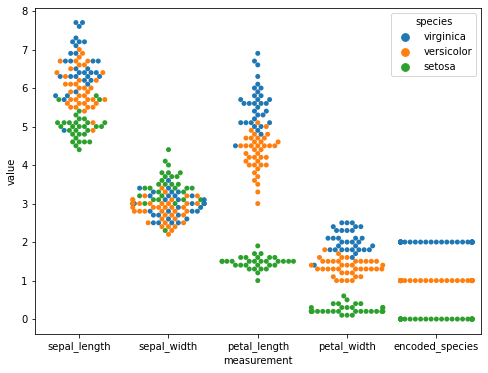

In [64]:
# "Melt" the dataset to "long-form" representation
df_melt = pd.melt(train, ['species', 'id'], var_name="measurement")

plt.figure(figsize=(8,6))
#  Draw a categorical scatterplot to show each observation
p = sns.swarmplot(x="measurement", y="value", hue= "species", data=df_melt)
# p.set(yscale="log")

# plt.show()

- Create 4 subplots (2 rows x 2 columns) of scatterplots

> sepal_length x sepal_width
> petal_length x petal_width
> sepal_area x petal_area
> sepal_length x petal_length
Make your figure size 14 x 8. What are your takeaways?

In [65]:

# Looks like we'll have to calculate sepal area to see if it's insightful
train["sepal_area"] = train.sepal_length * train.sepal_width
train["petal_area"] = train.petal_length * train.petal_width
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,encoded_species,id,sepal_area,petal_area
114,virginica,5.8,2.8,5.1,2.4,2,114,16.24,12.24
136,virginica,6.3,3.4,5.6,2.4,2,136,21.42,13.44
53,versicolor,5.5,2.3,4.0,1.3,1,53,12.65,5.20
19,setosa,5.1,3.8,1.5,0.3,0,19,19.38,0.45
38,setosa,4.4,3.0,1.3,0.2,0,38,13.20,0.26


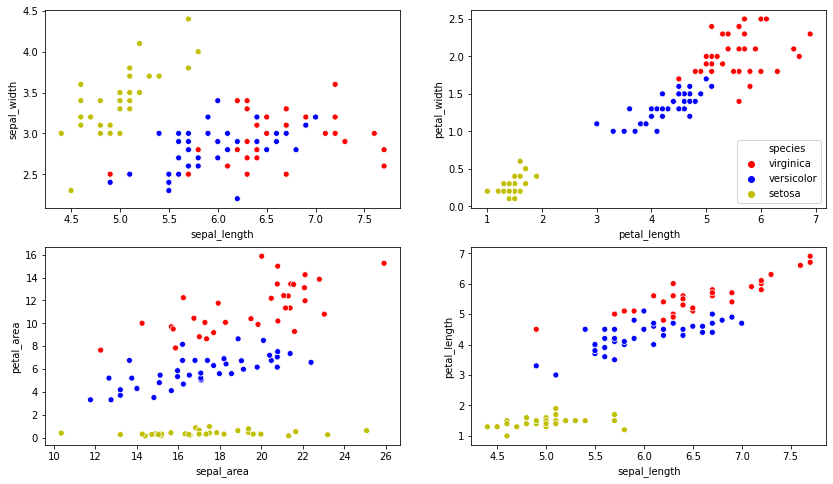

In [89]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))
plt.style.use('seaborn-colorblind')

# First subplot
plt.subplot(2, 2, 1)
sns.scatterplot(x="sepal_length", y="sepal_width", data=train, hue="species", palette=["r", "b","y"],
                legend=False)

# Second subplot
plt.subplot(2, 2, 2)
sns.scatterplot(x="petal_length", y="petal_width", data=train, hue="species", palette=["r", "b", "y"])
plt.legend(loc='lower right')

# Third subplot
plt.subplot(2, 2, 3)
sns.scatterplot(x="sepal_area", y="petal_area", data=train, hue="species", palette=["r", "b", "y"], legend=False)

# Forth subplot
plt.subplot(2, 2, 4)
sns.scatterplot(x="sepal_length", y="petal_length", data=train, hue="species", palette=["r", "b", "y"], legend=False)

plt.show()

- Create a heatmap of each variable layering correlation coefficient on top.

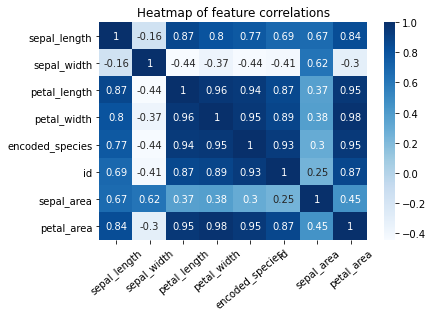

In [78]:
plt.title("Heatmap of feature correlations")
sns.heatmap(train.drop(columns="species").corr(), annot=True, cmap="Blues")
plt.xticks(rotation=40)
plt.show()

- Create a scatter matrix visualizing the interaction of each variable

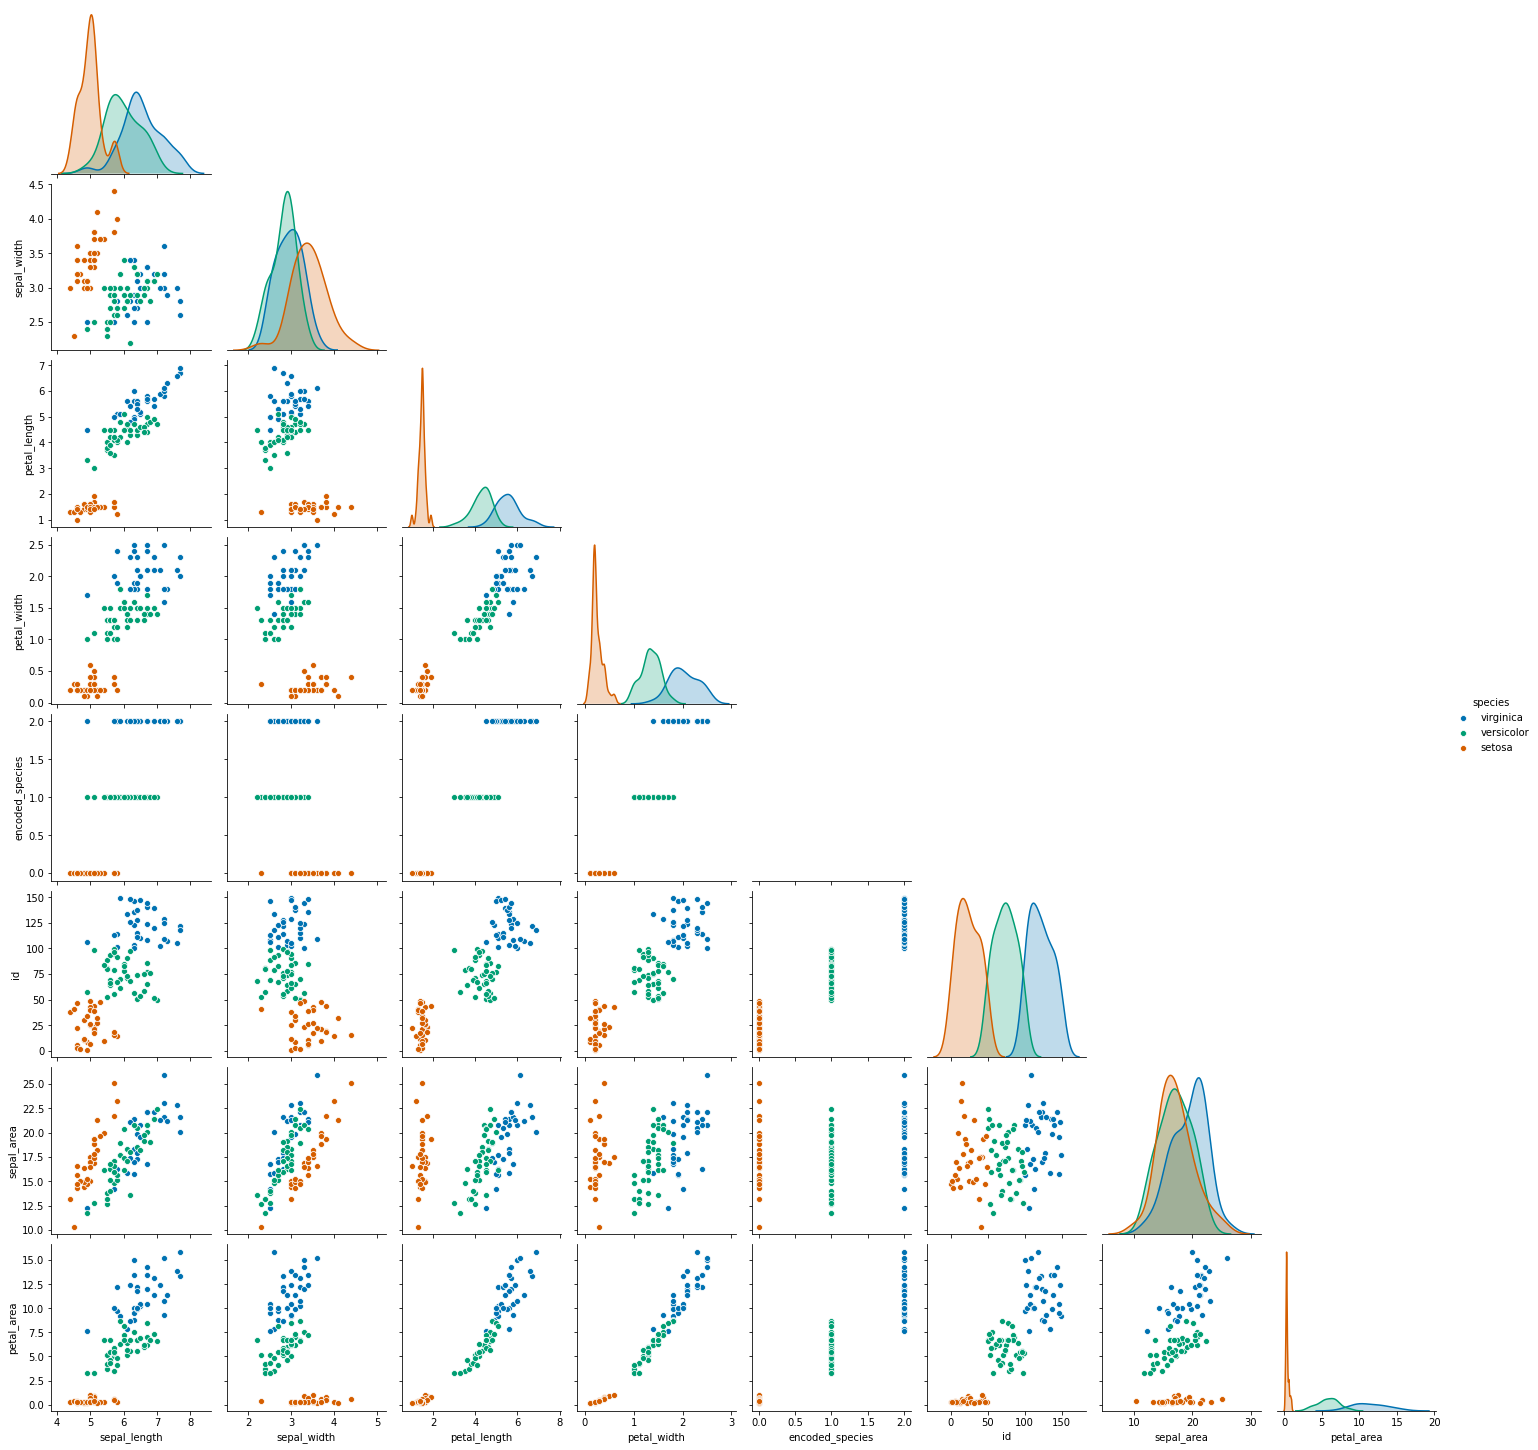

In [93]:
sns.pairplot(train, hue="species", corner=True)
plt.show()

- Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.

> must include null hypothesis, alternative hypothesis, t-test, results, summary
H0: the difference in sepal length between virginica and versicolor is insignificant.
Ha: the difference in sepal length between virginica and versicolor is substantial.
We will test if the sepal length of virginica is significantly different than that of the versicolor.
If there is difference, then variable sepal_length is a good choice to keep as a feature.
We can use a t-test here, as sepal_length is somewhat normally distributed.

In [69]:
virginica = train[train.species == "virginica"]
versicolor = train[train.species == "versicolor"]


In [70]:
alpha = .01

t, p = scipy.stats.ttest_ind(virginica.sepal_length, versicolor.sepal_length)

if p < alpha:
    print("We reject the null hypothesis that there is no significant difference between sepal length between virginica and versicolor species.")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis that there is no significant difference between sepal length between virginica and versicolor species.
